In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, StratifiedKFold
df = pd.read_csv('heart.csv')
df[0:60]

: 

In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

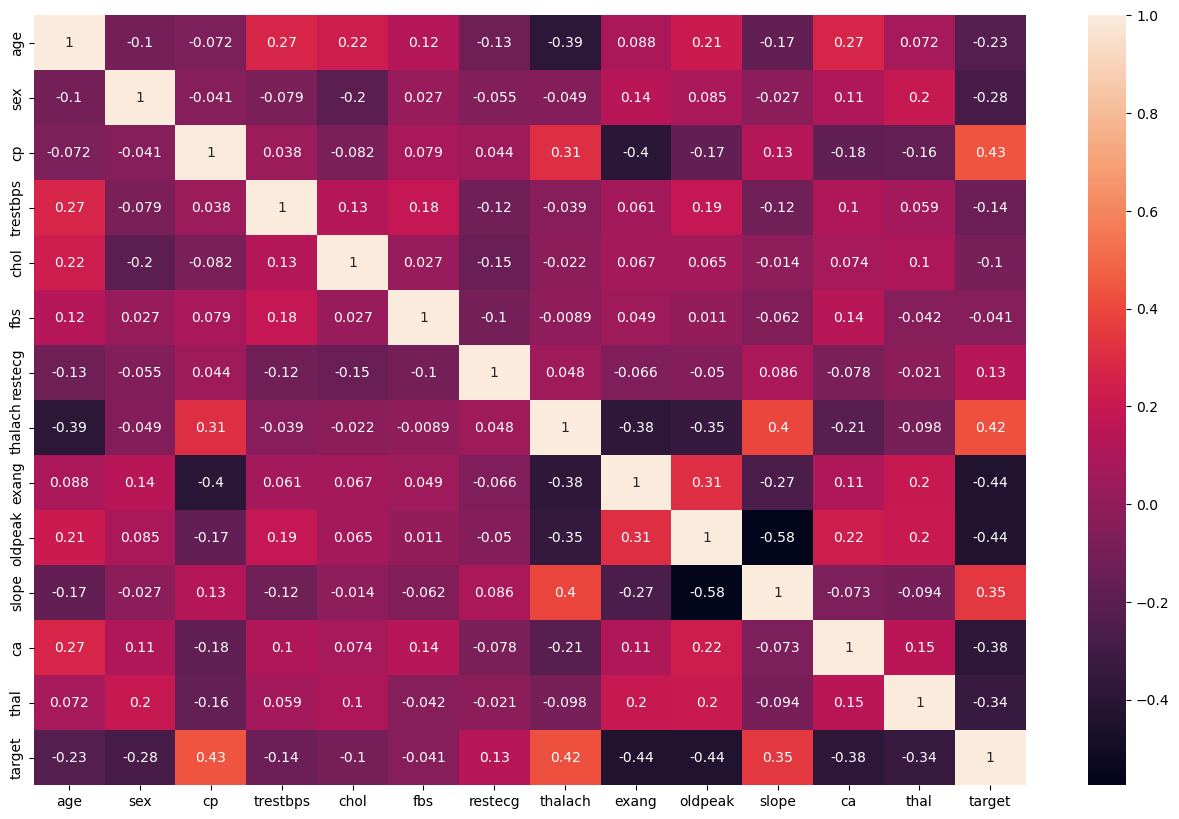

In [85]:
plt.figure(figsize=(16,10))

sns.heatmap(data=df.corr() ,annot=True)

In [86]:
x = df.drop('target',axis =1)
y = df['target']

In [87]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


1    526
0    499
Name: target, dtype: int64


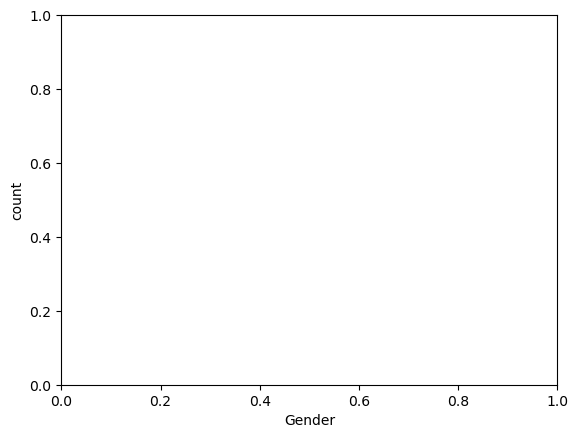

In [88]:
count = df.target.value_counts()
print(count)
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

In [89]:
print('Percentage of patience without heart problem :'+str(y.where(y==0).count()*100/303))
print('Percentage of patience with heart problem :'+str(y.where(y==1).count()*100/303))


Percentage of patience without heart problem :164.68646864686468
Percentage of patience with heart problem :173.59735973597358


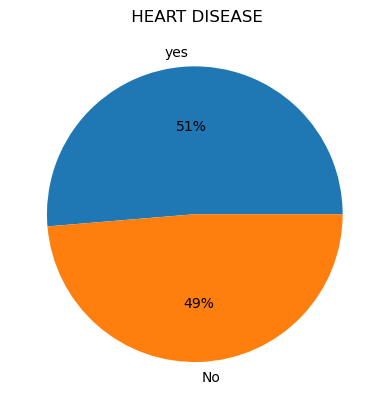

In [90]:
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title(' HEART DISEASE')
plt.show()

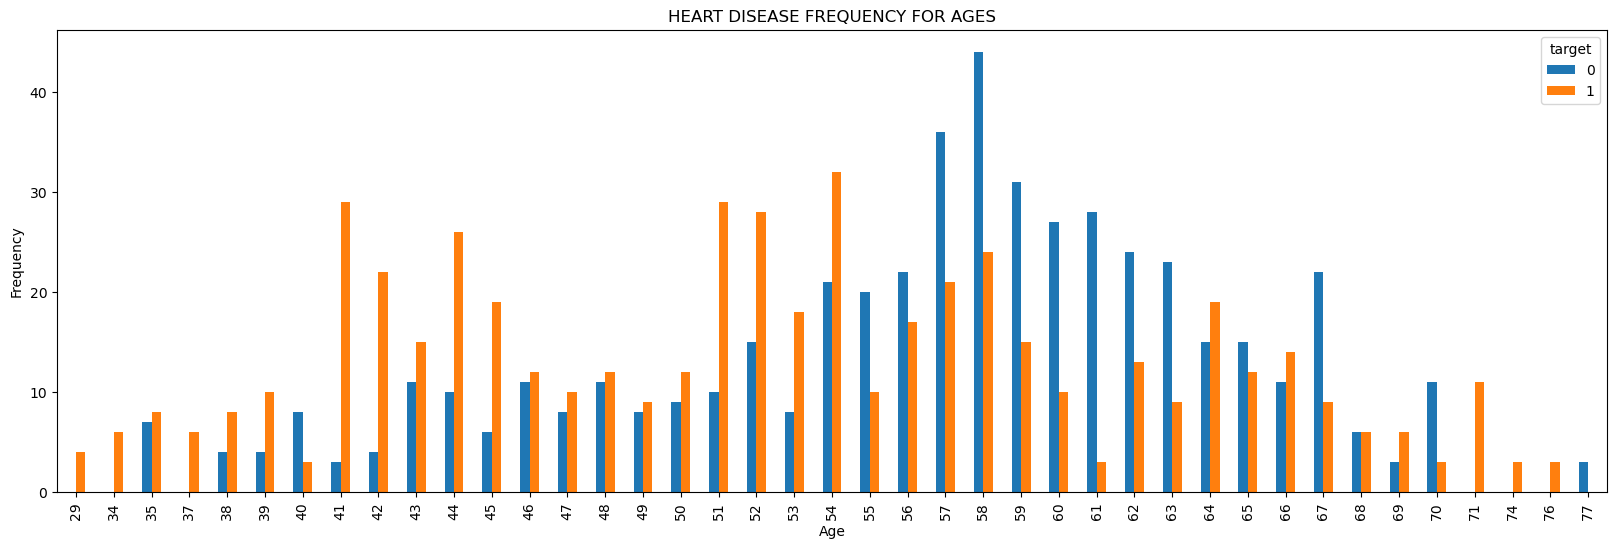

In [91]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('HEART DISEASE FREQUENCY FOR AGES')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [92]:
df['sex'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

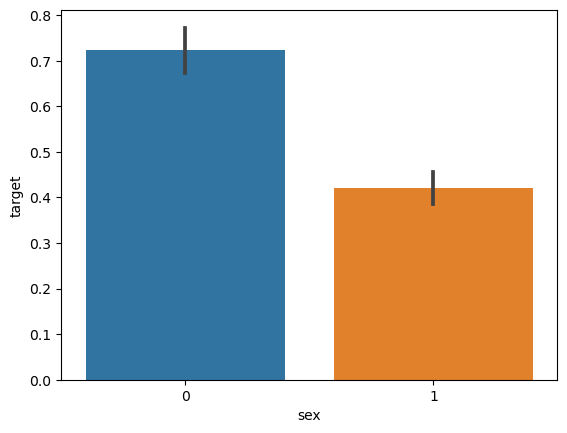

In [93]:
df['sex'] = df['sex']
sns.barplot(x=df['sex'],y=df['target'],data=df)

In [94]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

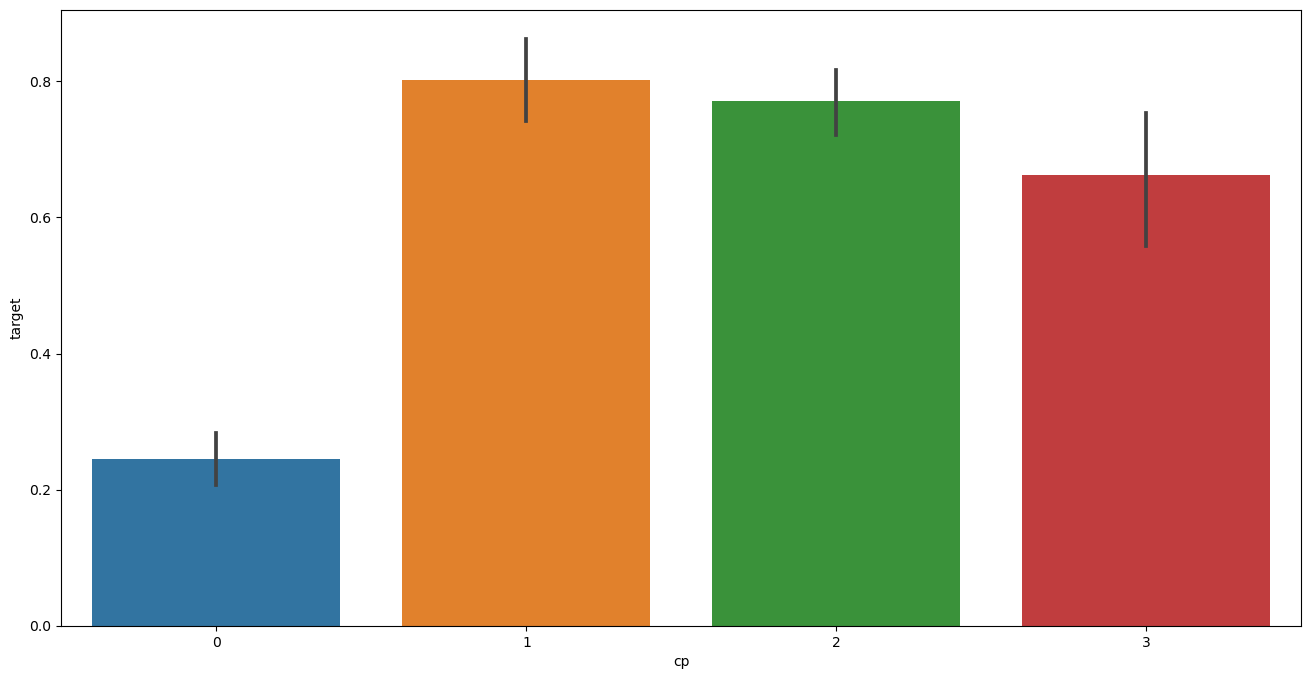

In [95]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['cp'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

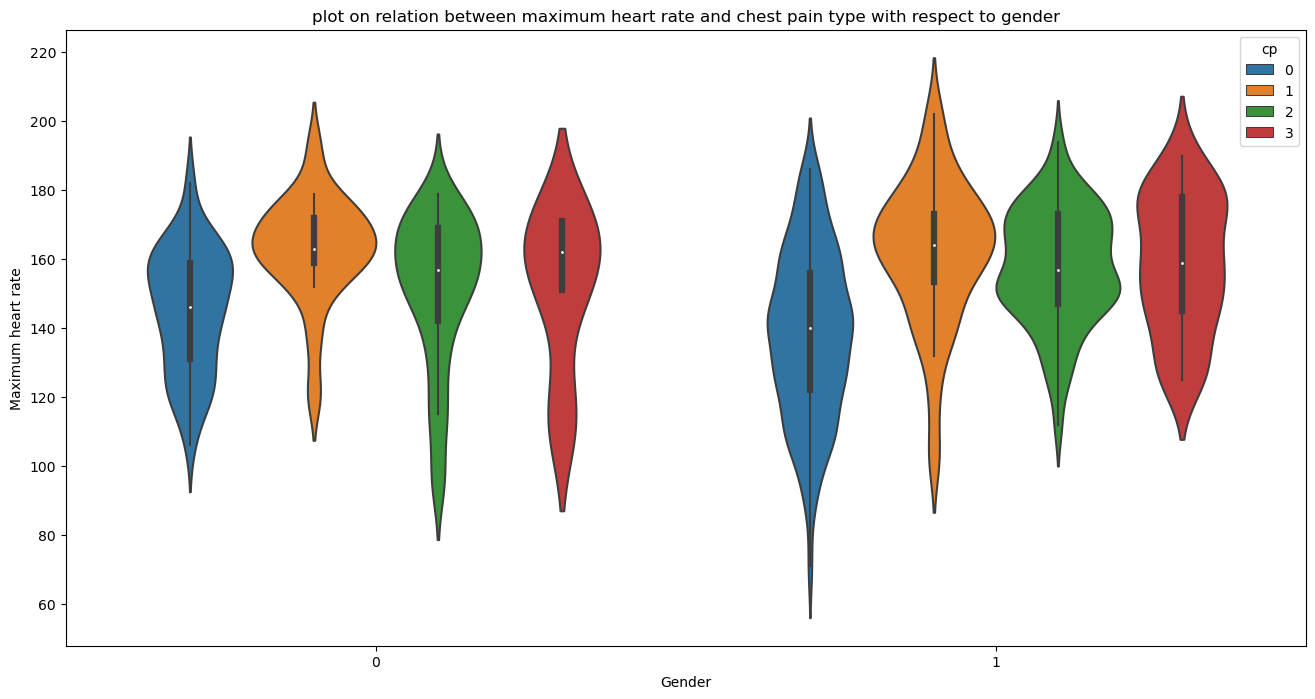

In [96]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="cp", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [97]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

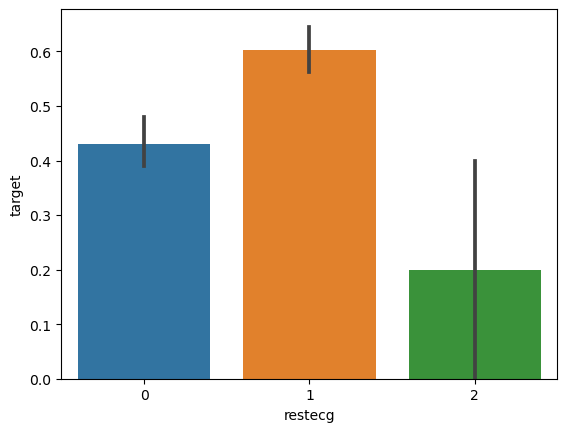

In [98]:
sns.barplot(x=df['restecg'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

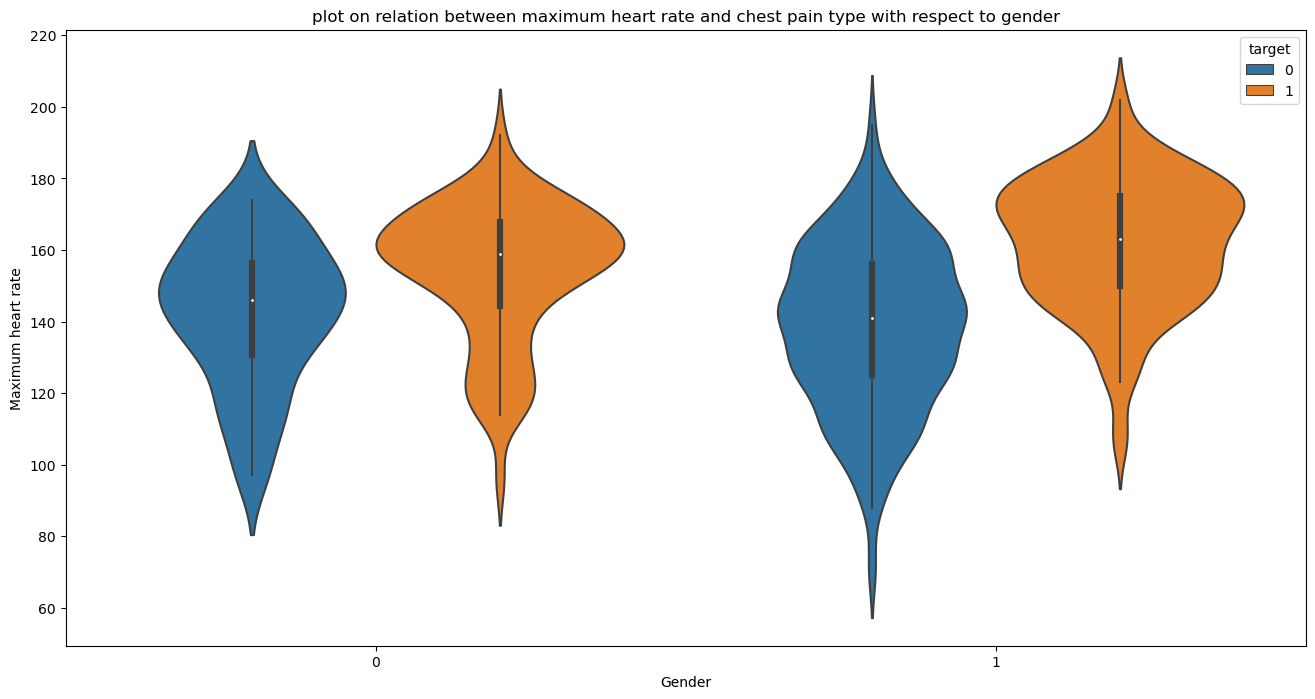

In [99]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="target", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [100]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

In [101]:
df['thalach'].median()

152.0

In [102]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

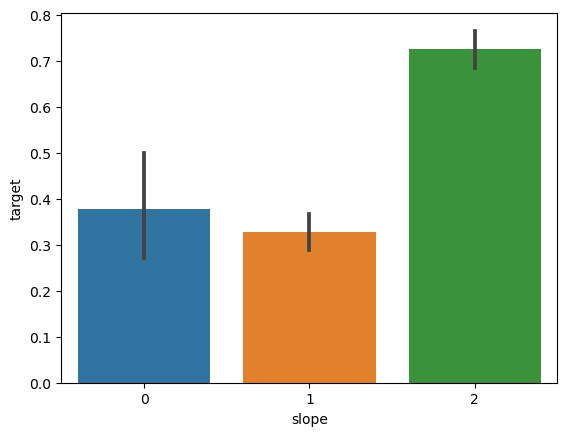

In [103]:
sns.barplot(x=df['slope'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

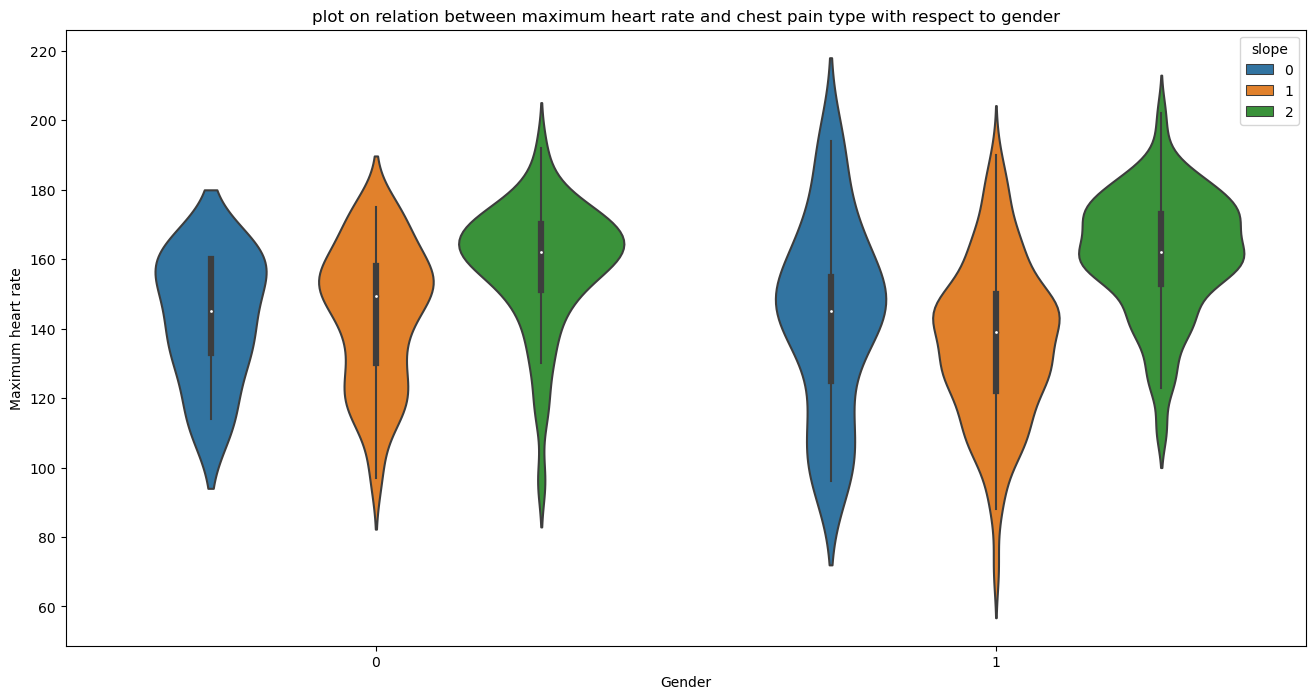

In [104]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="slope", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [105]:
df['chol'].median()

240.0

<Axes: ylabel='Frequency'>

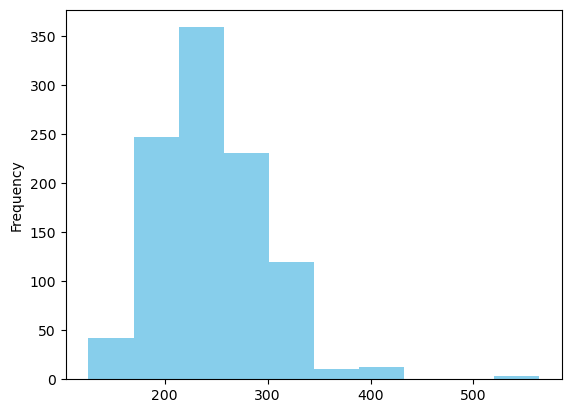

In [106]:
df['chol'].plot.hist(bins = 10, color = 'skyblue')

In [107]:
dataset = pd.get_dummies(df,columns =['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [108]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(X=x_train)
scl.scale_

array([ 9.08797163,  0.45508704,  1.04656239, 17.58297443, 48.29209844,
        0.3617251 ,  0.51886594, 22.70794583,  0.4718953 ,  1.14051672,
        0.6137885 ,  1.05697477,  0.60906413])

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3, random_state= 42)

In [110]:
x_test.shape

(308, 13)

In [111]:
x_train.shape

(717, 13)

In [112]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y,predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)

    B = (C/C.sum(axis=0))

    plt.figure(figsize=(20,4))

    labels = [0,1]

    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt=".3f",xticklabels=lables,yticklabels=lables)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)

    sns.heatmap(A, annot=True, cmap=cmap,fmt=".3f",xticklabels=lables,yticklabels=lables)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()
    


In [116]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
from sklearn import metrics

'''max_accuracy = 0
for X in range(60):
    classifier = LogisticRegression(random_state=x)
    classifier.fit(x_train , y_train)
    cur_acc = metrics.accuracy_score(y_test,classifier.Predict(x_test))
    if(cur_acc > max_accuracy):
       max_accuracy = cur_acc
       best_x = x


    param = {"c" : np.arange(0.1,1)}
    classifier = LogisticRegression(random_state=best_x,max_iter=30000)
    model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
    )

    classifier.fit(x_train,y_train)
    prediction = classifier.Predict(x_test)

print('Accuaracy in train :' , metrics.accuracy_score(y_train,classifier.Predict(x_train)))
print('Accuaracy in test :' , metrics.accuracy_score(y_test,prediction))

print('Precision in train :' , precision_score(y_train,classifier.Predict(x_train)))
print('Precision in test :' , precision_score(y_test,prediction))

print('Recall in train :' , recall_score(y_train,classifier.Predict(x_train)))
print('Recall in test :' , recall_score(y_test,prediction))

print('log loss',metrics.log_loss(y_test, prediction))
accuracy_score(y_train,classifier.Predict(x_train))

from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv= 5, scoring="accuracy" )
print("Vacuracy in train: %.5f%% (%.5f%%)" % (result.mean()*100.0,result.std()*100.0))

result = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv= 5, scoring="accuracy" )
print("CVacuracy in test: %.5f%% (%.5f%%)" % (result.mean()*100.0,result.std()*100.0))

plot_confusion_matrix(y_test,prediction)

feature = dict(zip(df.columns.values,list(classifier.coef_[0])))

feature = pd.DataFrame(feature, index=[0])
feature.plot.bar(tittle="Feature Importance", legend=False);'''



'max_accuracy = 0\nfor X in range(60):\n    classifier = LogisticRegression(random_state=x)\n    classifier.fit(x_train , y_train)\n    cur_acc = metrics.accuracy_score(y_test,classifier.Predict(x_test))\n    if(cur_acc > max_accuracy):\n       max_accuracy = cur_acc\n       best_x = x\n\n\n    param = {"c" : np.arange(0.1,1)}\n    classifier = LogisticRegression(random_state=best_x,max_iter=30000)\n    model = model_selection.GridSearchCV(\n\n    estimator= classifier,\n    param_grid=params,\n    cv = 10,\n    verbose = 10,\n    n_jobs=-1,\n    scoring="accuracy"\n    )\n\n    classifier.fit(x_train,y_train)\n    prediction = classifier.Predict(x_test)\n\nprint(\'Accuaracy in train :\' , metrics.accuracy_score(y_train,classifier.Predict(x_train)))\nprint(\'Accuaracy in test :\' , metrics.accuracy_score(y_test,prediction))\n\nprint(\'Precision in train :\' , precision_score(y_train,classifier.Predict(x_train)))\nprint(\'Precision in test :\' , precision_score(y_test,prediction))\n\npr

In [ ]:

from sklearn import svm
params = {
    "kernel" : ["linear","poly","rbf","sigmod"],
    "degree": np.arange(1,15,2),
    "C": np.arange(0,1,1)
}
classifier = svm.SVC(max_iter=30000)
model=model_selection.GridSearchCV(
     
    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)
prediction = model.Predict(x_test)

print('Accuaracy in train :' , metrics.accuracy_score(y_train,model.Predict(x_train)))
print('Accuaracy in test :' , metrics.accuracy_score(y_test,prediction))

print('Precision in train :' , precision_score(y_train,model.Predict(x_train)))
print('Precision in test :' , precision_score(y_test,prediction))

print('Recall in train :' , recall_score(y_train,model.Predict(x_train)))
print('Recall in test :' , recall_score(y_test,prediction))

print('hinge loss',metrics.hinge_loss(y_test, prediction))

result = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv= 5, scoring="accuracy" )
print("Accuracy: %.5f%% (%.5f%%)" % (result.mean()*100.0,result.std()*100.0))

result = cross_val_score(estimator = classifier, X =x_train, y = y_train, cv= 5, scoring="accuracy" )
print("CVacuracy in test: %.5f%% (%.5f%%)" % (result.mean()*100.0,result.std()*100.0))

plot_confusion_matrix(y_test,prediction)



: 